In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
%matplotlib inline

In [2]:
data_path = os.path.join(os.getcwd(), 'datasets', 'credit.csv')
credit = pd.read_csv(data_path, delimiter=',')

In [3]:
len(credit)

1001

In [4]:
len(credit.columns)

21

In [15]:
credit.describe(exclude=[np.number])

,CheckingAccount,CreditHistory,Purpose,SavingsAccount,YearsEmployed,PersonalStatus,OtherDebtors,Property,OtherPlans,Housing,Job,Telephone,Foreign,Approve
count,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001
unique,4,5,10,5,5,5,3,4,3,3,4,2,2,2
top,none,ok_til_now,television,<100,<4,male_single,none,car,none,own,skilled,no,yes,good
freq,394,530,280,603,339,548,908,333,815,714,631,596,963,701


In [16]:
credit.describe(exclude=[np.object])

,Duration,CreditAmount,InstallmentRate,ResidentSince,Age,NumCreditsAtBank,Dependents
count,1001.000000,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,20.882118,-9.957330e+05,-7.019980,2.842158,35.217782,0.406593,0.969031
std,12.070878,3.160708e+07,316.165715,1.106825,15.398264,31.656714,5.894916
min,0.000000,-1.000000e+09,-10000.000000,0.000000,-293.000000,-1000.000000,-185.000000
25%,12.000000,1.364000e+03,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2.319000e+03,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3.972000e+03,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,1.842400e+04,4.000000,4.000000,75.000000,4.000000,2.000000


In [17]:
credit.head(10)

,CheckingAccount,Duration,CreditHistory,Purpose,CreditAmount,SavingsAccount,YearsEmployed,InstallmentRate,PersonalStatus,OtherDebtors,...,Property,Age,OtherPlans,Housing,NumCreditsAtBank,Job,Dependents,Telephone,Foreign,Approve
0,<0,0.0,ok,furniture,-1.000000e+09,unknown,unemployed,-10000.0,female_single,none,...,car,-293.0,none,own,-1000.0,skilled,-185.0,yes,no,good
1,<0,6.0,critical,television,1.169000e+03,unknown,>=7,4.0,male_single,none,...,real_estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
2,<200,48.0,ok_til_now,television,5.951000e+03,<100,<4,2.0,female,none,...,real_estate,22.0,none,own,1.0,skilled,1.0,no,yes,bad
3,none,12.0,critical,education,2.096000e+03,<100,<7,2.0,male_single,none,...,real_estate,49.0,none,own,1.0,unskilled,2.0,no,yes,good
4,<0,42.0,ok_til_now,furniture,7.882000e+03,<100,<7,2.0,male_single,guarantor,...,savings,45.0,none,free,1.0,skilled,2.0,no,yes,good
5,<0,24.0,past_delays,car_new,4.870000e+03,<100,<4,3.0,male_single,none,...,unknown,53.0,none,free,2.0,skilled,2.0,no,yes,bad
6,none,36.0,ok_til_now,education,9.055000e+03,unknown,<4,2.0,male_single,none,...,unknown,35.0,none,free,1.0,unskilled,2.0,yes,yes,good
7,none,24.0,ok_til_now,furniture,2.835000e+03,<1000,>=7,3.0,male_single,none,...,savings,53.0,none,own,1.0,skilled,1.0,no,yes,good
8,<200,36.0,ok_til_now,car_used,6.948000e+03,<100,<4,2.0,male_single,none,...,car,35.0,none,rent,1.0,management,1.0,yes,yes,good
9,none,12.0,ok_til_now,television,3.059000e+03,>=1000,<7,2.0,male_divorced,none,...,real_estate,61.0,none,own,1.0,unskilled,1.0,no,yes,good


In [22]:
pd.set_option('display.max_columns', 21)

In [23]:
credit.head(10)

,CheckingAccount,Duration,CreditHistory,Purpose,CreditAmount,SavingsAccount,YearsEmployed,InstallmentRate,PersonalStatus,OtherDebtors,ResidentSince,Property,Age,OtherPlans,Housing,NumCreditsAtBank,Job,Dependents,Telephone,Foreign,Approve
0,<0,0.0,ok,furniture,-1.000000e+09,unknown,unemployed,-10000.0,female_single,none,0.0,car,-293.0,none,own,-1000.0,skilled,-185.0,yes,no,good
1,<0,6.0,critical,television,1.169000e+03,unknown,>=7,4.0,male_single,none,4.0,real_estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
2,<200,48.0,ok_til_now,television,5.951000e+03,<100,<4,2.0,female,none,2.0,real_estate,22.0,none,own,1.0,skilled,1.0,no,yes,bad
3,none,12.0,critical,education,2.096000e+03,<100,<7,2.0,male_single,none,3.0,real_estate,49.0,none,own,1.0,unskilled,2.0,no,yes,good
4,<0,42.0,ok_til_now,furniture,7.882000e+03,<100,<7,2.0,male_single,guarantor,4.0,savings,45.0,none,free,1.0,skilled,2.0,no,yes,good
5,<0,24.0,past_delays,car_new,4.870000e+03,<100,<4,3.0,male_single,none,4.0,unknown,53.0,none,free,2.0,skilled,2.0,no,yes,bad
6,none,36.0,ok_til_now,education,9.055000e+03,unknown,<4,2.0,male_single,none,4.0,unknown,35.0,none,free,1.0,unskilled,2.0,yes,yes,good
7,none,24.0,ok_til_now,furniture,2.835000e+03,<1000,>=7,3.0,male_single,none,4.0,savings,53.0,none,own,1.0,skilled,1.0,no,yes,good
8,<200,36.0,ok_til_now,car_used,6.948000e+03,<100,<4,2.0,male_single,none,2.0,car,35.0,none,rent,1.0,management,1.0,yes,yes,good
9,none,12.0,ok_til_now,television,3.059000e+03,>=1000,<7,2.0,male_divorced,none,4.0,real_estate,61.0,none,own,1.0,unskilled,1.0,no,yes,good


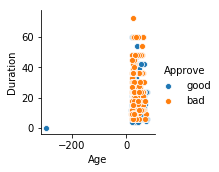

In [36]:
sns.pairplot(data=credit, x_vars=['Age'], y_vars=['Duration'], hue='Approve')

In [40]:
credit = pd.read_csv(data_path, delimiter=',')

In [41]:
credit.head()

,CheckingAccount,Duration,CreditHistory,Purpose,CreditAmount,SavingsAccount,YearsEmployed,InstallmentRate,PersonalStatus,OtherDebtors,ResidentSince,Property,Age,OtherPlans,Housing,NumCreditsAtBank,Job,Dependents,Telephone,Foreign,Approve
0,<0,0.0,ok,furniture,-1.000000e+09,unknown,unemployed,-10000.0,female_single,none,0.0,car,-293.0,none,own,-1000.0,skilled,-185.0,yes,no,good
1,<0,6.0,critical,television,1.169000e+03,unknown,>=7,4.0,male_single,none,4.0,real_estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
2,<200,48.0,ok_til_now,television,5.951000e+03,<100,<4,2.0,female,none,2.0,real_estate,22.0,none,own,1.0,skilled,1.0,no,yes,bad
3,none,12.0,critical,education,2.096000e+03,<100,<7,2.0,male_single,none,3.0,real_estate,49.0,none,own,1.0,unskilled,2.0,no,yes,good
4,<0,42.0,ok_til_now,furniture,7.882000e+03,<100,<7,2.0,male_single,guarantor,4.0,savings,45.0,none,free,1.0,skilled,2.0,no,yes,good


In [45]:
credit = credit[credit[:]['Age'] > 0]
len(credit)

1000

In [46]:
credit.head()

,CheckingAccount,Duration,CreditHistory,Purpose,CreditAmount,SavingsAccount,YearsEmployed,InstallmentRate,PersonalStatus,OtherDebtors,ResidentSince,Property,Age,OtherPlans,Housing,NumCreditsAtBank,Job,Dependents,Telephone,Foreign,Approve
1,<0,6.0,critical,television,1169.0,unknown,>=7,4.0,male_single,none,4.0,real_estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
2,<200,48.0,ok_til_now,television,5951.0,<100,<4,2.0,female,none,2.0,real_estate,22.0,none,own,1.0,skilled,1.0,no,yes,bad
3,none,12.0,critical,education,2096.0,<100,<7,2.0,male_single,none,3.0,real_estate,49.0,none,own,1.0,unskilled,2.0,no,yes,good
4,<0,42.0,ok_til_now,furniture,7882.0,<100,<7,2.0,male_single,guarantor,4.0,savings,45.0,none,free,1.0,skilled,2.0,no,yes,good
5,<0,24.0,past_delays,car_new,4870.0,<100,<4,3.0,male_single,none,4.0,unknown,53.0,none,free,2.0,skilled,2.0,no,yes,bad


In [48]:
unique, unique_counts = np.unique(credit['Purpose'] ,return_counts=True)

In [49]:
unique_counts

array([ 12,  97, 234, 103,  50, 181,  12,  22,   9, 280])

In [62]:
d = dict()
for attribute in credit.columns:
    unq, unq_counts = np.unique(credit[attribute], return_counts=True)
    d[attribute] = len(unq_counts)
d

{'CheckingAccount': 4,
 'Duration': 33,
 'CreditHistory': 5,
 'Purpose': 10,
 'CreditAmount': 921,
 'SavingsAccount': 5,
 'YearsEmployed': 5,
 'InstallmentRate': 4,
 'PersonalStatus': 4,
 'OtherDebtors': 3,
 'ResidentSince': 4,
 'Property': 4,
 'Age': 53,
 'OtherPlans': 3,
 'Housing': 3,
 'NumCreditsAtBank': 4,
 'Job': 4,
 'Dependents': 2,
 'Telephone': 2,
 'Foreign': 2,
 'Approve': 2}

In [65]:
credit_clean = credit.copy(deep=True)
for column in credit_clean.columns:
    if column not in ['CreditAmount', 'Age', 'Duration', 'Approve']:
        unq, unq_counts = np.unique(credit[column], return_counts=True)
        credit_clean[column] = credit_clean[column].astype('category')

In [66]:
credit_clean.head(10)

,CheckingAccount,Duration,CreditHistory,Purpose,CreditAmount,SavingsAccount,YearsEmployed,InstallmentRate,PersonalStatus,OtherDebtors,ResidentSince,Property,Age,OtherPlans,Housing,NumCreditsAtBank,Job,Dependents,Telephone,Foreign,Approve
1,<0,6.0,critical,television,1169.0,unknown,>=7,4.0,male_single,none,4.0,real_estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
2,<200,48.0,ok_til_now,television,5951.0,<100,<4,2.0,female,none,2.0,real_estate,22.0,none,own,1.0,skilled,1.0,no,yes,bad
3,none,12.0,critical,education,2096.0,<100,<7,2.0,male_single,none,3.0,real_estate,49.0,none,own,1.0,unskilled,2.0,no,yes,good
4,<0,42.0,ok_til_now,furniture,7882.0,<100,<7,2.0,male_single,guarantor,4.0,savings,45.0,none,free,1.0,skilled,2.0,no,yes,good
5,<0,24.0,past_delays,car_new,4870.0,<100,<4,3.0,male_single,none,4.0,unknown,53.0,none,free,2.0,skilled,2.0,no,yes,bad
6,none,36.0,ok_til_now,education,9055.0,unknown,<4,2.0,male_single,none,4.0,unknown,35.0,none,free,1.0,unskilled,2.0,yes,yes,good
7,none,24.0,ok_til_now,furniture,2835.0,<1000,>=7,3.0,male_single,none,4.0,savings,53.0,none,own,1.0,skilled,1.0,no,yes,good
8,<200,36.0,ok_til_now,car_used,6948.0,<100,<4,2.0,male_single,none,2.0,car,35.0,none,rent,1.0,management,1.0,yes,yes,good
9,none,12.0,ok_til_now,television,3059.0,>=1000,<7,2.0,male_divorced,none,4.0,real_estate,61.0,none,own,1.0,unskilled,1.0,no,yes,good
10,<200,30.0,critical,car_new,5234.0,<100,unemployed,4.0,male_married,none,2.0,car,28.0,none,own,2.0,management,1.0,no,yes,bad


In [68]:
import sklearn
sklearn.__version__

'0.19.1'

In [73]:
X = pd.get_dummies(credit_clean.drop('Approve', axis=1))
len(X.columns)

71

In [77]:
X

,Duration,CreditAmount,Age,CheckingAccount_<0,CheckingAccount_<200,CheckingAccount_>=200,CheckingAccount_none,CreditHistory_critical,CreditHistory_ok,CreditHistory_ok_at_this_bank,...,Job_management,Job_skilled,Job_unemployed,Job_unskilled,Dependents_1.0,Dependents_2.0,Telephone_no,Telephone_yes,Foreign_no,Foreign_yes
1,6.0,1169.0,67.0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
2,48.0,5951.0,22.0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,12.0,2096.0,49.0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,1,0,0,1
4,42.0,7882.0,45.0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
5,24.0,4870.0,53.0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
6,36.0,9055.0,35.0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,1
7,24.0,2835.0,53.0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1
8,36.0,6948.0,35.0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
9,12.0,3059.0,61.0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1
10,30.0,5234.0,28.0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1


In [76]:
y = pd.get_dummies(credit_clean['Approve'])['good']
y # 1 means 'good' and 0 means 'bad'

1       1
2       0
3       1
4       1
5       0
6       1
7       1
8       1
9       1
10      0
11      0
12      0
13      1
14      0
15      1
16      0
17      1
18      1
19      0
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      0
       ..
971     1
972     1
973     0
974     0
975     1
976     1
977     1
978     1
979     0
980     0
981     0
982     0
983     1
984     0
985     1
986     1
987     1
988     1
989     1
990     1
991     1
992     1
993     1
994     1
995     1
996     1
997     1
998     1
999     0
1000    1
Name: good, Length: 1000, dtype: uint8

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [79]:
len(X_train)

900

In [80]:
len(X_test)

100

In [81]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1000)

In [86]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
            splitter='best')

In [82]:
column_names = list(X.columns)
len(column_names)

71

In [83]:
column_names[0:5]

['Duration',
 'CreditAmount',
 'Age',
 'CheckingAccount_<0',
 'CheckingAccount_<200']

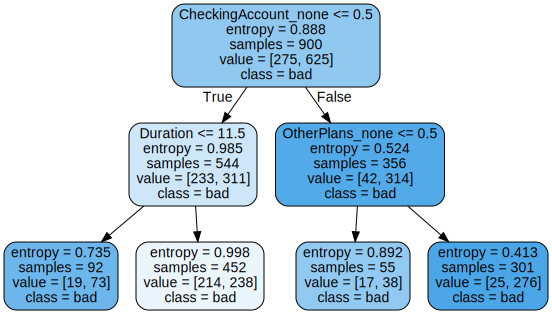

In [87]:
dot_data = export_graphviz(dt, out_file=None, feature_names=column_names, class_names=credit_clean['Approve'].unique(), filled=True, rounded=True, special_characters=False)
graph = graphviz.Source(dot_data)
graph

In [88]:
gain_CheckingAccount_none = 0.888 - (275/900)*0.985 - (625/900)*0.524
gain_Duration = 0.985 - (233/544)*0.735 - (311/544)*0.998
gain_OtherPlans_none = 0.524 - (42/356)*0.892 - (314/356)*0.413

In [89]:
gain_CheckingAccount_none

0.22313888888888883

In [90]:
gain_Duration

0.09964522058823533

In [91]:
gain_OtherPlans_none

0.05448876404494385

In [92]:
y_pred = dt.predict(X_test)

In [98]:
accuracy_score(y_test, y_pred)

0.75

In [101]:
l = y_test[y_test == 1].count()

In [102]:
l

75

In [111]:
len(y_pred)

100

In [114]:
len(y_train[y_train == 1])

625

In [115]:
y_pred_train = dt.predict(X_train)

In [116]:
accuracy_score(y_train, y_pred_train)

0.6944444444444444

In [117]:
dt_full = DecisionTreeClassifier(criterion='entropy', random_state=1000)

In [119]:
dt_full.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
            splitter='best')

In [120]:
y_pred_test_full = dt_full.predict(X_test)
y_pred_train_full = dt_full.predict(X_train)

In [121]:
accuracy_score(y_test, y_pred_test_full) 

0.67

In [122]:
accuracy_score(y_train, y_pred_train_full)

1.0

In [123]:
cm_train = confusion_matrix(y_train, y_pred_train_full)
cm_test = confusion_matrix(y_test, y_pred_test_full)

In [124]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

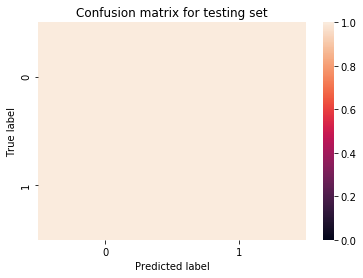

In [125]:
plot_confusion_matrix(cm_test, title='Confusion matrix for testing set')

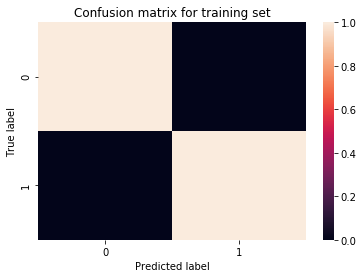

In [127]:
plot_confusion_matrix(cm_train, title='Confusion matrix for training set')

In [189]:
rdf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=1000, max_depth=10)

In [190]:
rdf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1000, verbose=0,
            warm_start=False)

In [191]:
y_pred_rdf_train = rdf.predict(X_train)
y_pred_rdf_test = rdf.predict(X_test)

In [192]:
accuracy_score(y_train, y_pred_rdf_train)

0.9533333333333334

In [193]:
accuracy_score(y_test, y_pred_rdf_test)

0.71

In [194]:
cm_rdf_train = confusion_matrix(y_train, y_pred_rdf_train)
cm_rdf_test =  confusion_matrix(y_test, y_pred_rdf_test)

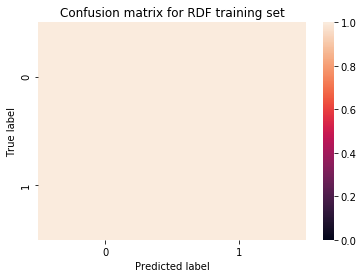

In [195]:
plot_confusion_matrix(cm_rdf_train, title='Confusion matrix for RDF training set')

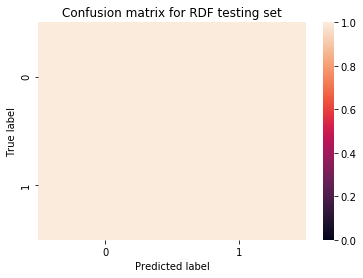

In [196]:
plot_confusion_matrix(cm_rdf_test, title='Confusion matrix for RDF testing set')